## Importing the dependecies

In [36]:
# ! pip install tensorflow-gpu==1.15.0 tensorflow==1.15.0 stable-baselines gym-anytrading gym

In [37]:
# gym stuff
import gym
import gym_anytrading

#Stable baselines
from stable_baselines.common.vec_env import DummyVecEnv #it is a wrapper
from stable_baselines import A2C #A2C is RL algorithm

#processing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## MarketWatch GME data

In [38]:
df = pd.read_csv('data/TCS.NS.csv')

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       252 non-null    object 
 1   Open       250 non-null    float64
 2   High       250 non-null    float64
 3   Low        250 non-null    float64
 4   Close      250 non-null    float64
 5   Adj Close  250 non-null    float64
 6   Volume     250 non-null    float64
dtypes: float64(6), object(1)
memory usage: 13.9+ KB


# Coverting date to datetimeformat

In [40]:
df['Date'] = pd.to_datetime(df['Date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype         
---  ------     --------------  -----         
 0   Date       252 non-null    datetime64[ns]
 1   Open       250 non-null    float64       
 2   High       250 non-null    float64       
 3   Low        250 non-null    float64       
 4   Close      250 non-null    float64       
 5   Adj Close  250 non-null    float64       
 6   Volume     250 non-null    float64       
dtypes: datetime64[ns](1), float64(6)
memory usage: 13.9 KB


In [41]:
# df['Open'] = df['Open'].apply(lambda x: float(x.replace(",","")))

In [42]:
# df['High'] = df['High'].apply(lambda x: float(x.replace(",","")))

In [43]:
# df['Low'] = df['Low'].apply(lambda x: float(x.replace(",","")))

In [44]:
# df['Close'] = df['Close'].apply(lambda x: float(x.replace(",","")))

In [45]:
#Sorting the data from oldest to newest
df.sort_values('Date',ascending=True,inplace=True)
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-06-17,2046.0,2058.850098,2026.550049,2047.800049,2020.793091,2703527.0
1,2020-06-18,2045.0,2059.199951,2025.199951,2038.099976,2011.220947,1944389.0
2,2020-06-19,2042.0,2090.000000,2032.000000,2044.599976,2017.635376,5681758.0
3,2020-06-22,2050.0,2052.250000,2019.150024,2027.949951,2001.204956,3196138.0
4,2020-06-23,2027.0,2044.000000,2010.000000,2035.300049,2008.457886,4205944.0


In [46]:
# Set index as date
df.set_index('Date',inplace=True)
df.head()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2020-06-17,2046.0,2058.850098,2026.550049,2047.800049,2020.793091,2703527.0
2020-06-18,2045.0,2059.199951,2025.199951,2038.099976,2011.220947,1944389.0
2020-06-19,2042.0,2090.000000,2032.000000,2044.599976,2017.635376,5681758.0
2020-06-22,2050.0,2052.250000,2019.150024,2027.949951,2001.204956,3196138.0
2020-06-23,2027.0,2044.000000,2010.000000,2035.300049,2008.457886,4205944.0


In [47]:
env = gym.make('stocks-v0',df=df,frame_bound=(5,250),window_size=5)
#window_size = how many previous timestep data our bot is going to have for referce to make a trade
#frame_bound = specifies how much data we want to pass through our environment we are gonna start at 5th time step 
#and go all the way to the hundredth time_step . 

`Note since our window size is 5 and frame_bound's initial value is also 5 our env.prices will start from very first day i.e. 05/25/2021`

`And if our frame bound's initial value is changed to (10,100) from (5,100) our env.prices will start from 5 day later i.e. 05/18/2021`

In [48]:
print("(env.prices\n",env.prices)
print("env.signal_features\n",env.signal_features) #it shows price and change in price from previous timestep


(env.prices
 [2047.800049 2038.099976 2044.599976 2027.949951 2035.300049 2042.199951
 2016.099976 2118.850098 2101.649902 2082.149902 2092.050049 2157.149902
 2199.649902 2263.199951 2269.899902 2218.899902 2204.350098 2222.350098
 2220.       2171.949951 2233.899902 2234.75     2200.75     2207.899902
 2225.050049 2190.949951 2171.199951 2157.399902 2206.800049 2309.75
 2276.050049 2279.5      2281.399902 2254.149902 2249.699951 2259.5
 2308.100098 2295.350098 2282.800049 2279.899902 2257.350098 2254.449951
 2242.149902 2253.399902 2269.75     2256.600098 2252.850098 2248.600098
 2248.100098 2242.649902 2253.5      2248.399902 2238.550049 2257.25
 2246.350098 2265.149902 2299.5      2288.800049 2327.050049 2348.199951
 2327.649902 2331.149902 2374.100098 2491.399902 2491.399902 2503.
 2460.949951 2449.899902 2465.300049 2522.949951 2467.449951 2332.25
 2422.300049 2426.300049 2488.399902 2492.300049 2523.449951 2705.800049
 2714.300049 2735.949951 2825.699951 2812.949951 2830.       

## Build Environment

 n_state
[[3.20014990e+03 1.69499510e+01]
 [3.20025000e+03 1.00098000e-01]
 [3.21680005e+03 1.65500490e+01]
 [3.27380005e+03 5.70000000e+01]
 [3.27635010e+03 2.55004900e+00]]
 reward
-13.600097999999889
  done
True
  info
{'total_reward': 1290.1495340000006, 'total_profit': 0.650369868890145, 'position': 0}
 


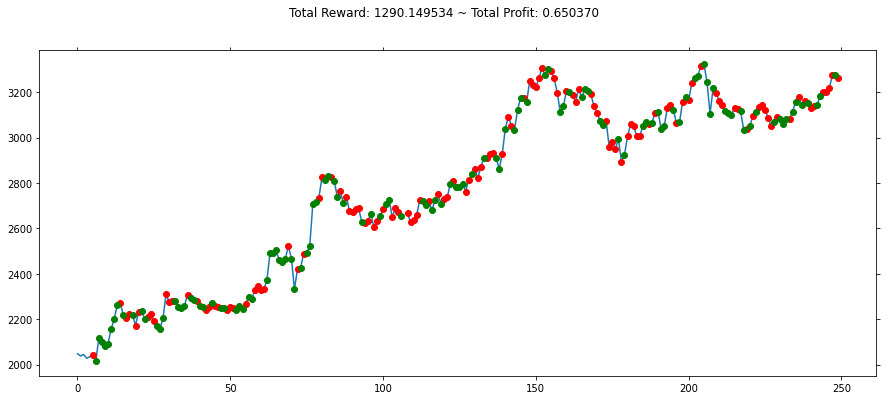

In [49]:
#Taking random steps/ Testing the env
state = env.reset() #it allows us to get initial state
while True:
    action = env.action_space.sample() #looping through each index and taking random action
    n_state,reward,done,info = env.step(action) #applying action to our environment. and storing them in variables
    if done: 
        print(f" n_state\n{n_state}\n reward\n{reward}\n  done\n{done}\n  info\n{info}\n ")
        
        break

plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()

In [50]:
env.action_space #we have only 2 action buy and sell

Discrete(2)

# 3.1 - Add Custom Indicators

### 3.1.1 Install and Import New Dependencies

##### `We'll  be using finta`

In [51]:
# !pip install finta
from gym_anytrading.envs import StocksEnv
from finta import TA #Technical Analysis lirary


### 3.1.2 - Fix Volume Column

In [54]:
# print(df.dtypes)
# #inintially volume is object/string changing it to float
# df['Volume'] = df['Volume'].apply(lambda x: float(x.replace(",","")))

# # (x.replace",","") stripping/removing all the commas


### 3.1.3 Calculate SMA,RSI and OBV

In [55]:
df['SMA'] = TA.SMA(df,12) #we want 12 period simple movimg average
df['RSI'] = TA.RSI(df) #relative strength index
df['OBV'] = TA.OBV(df) #on balance volume inndicator

df.fillna(0,inplace=True) #removing NAN with 0

In [56]:
df.head(15)

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-17,2046.000000,2058.850098,2026.550049,2047.800049,2020.793091,2703527.0,0.000000,0.000000,0.0
2020-06-18,2045.000000,2059.199951,2025.199951,2038.099976,2011.220947,1944389.0,0.000000,0.000000,-1944389.0
2020-06-19,2042.000000,2090.000000,2032.000000,2044.599976,2017.635376,5681758.0,0.000000,41.915984,3737369.0
2020-06-22,2050.000000,2052.250000,2019.150024,2027.949951,2001.204956,3196138.0,0.000000,19.438958,541231.0
2020-06-23,2027.000000,2044.000000,2010.000000,2035.300049,2008.457886,4205944.0,0.000000,35.804389,4747175.0
2020-06-24,2034.000000,2064.250000,2031.599976,2042.199951,2015.266846,2560937.0,0.000000,46.741984,7308112.0
2020-06-25,2035.000000,2060.000000,2009.250000,2016.099976,1989.511108,3043931.0,0.000000,27.591658,4264181.0
2020-06-26,2025.000000,2132.000000,2019.949951,2118.850098,2090.906006,6300722.0,0.000000,73.544483,10564903.0
2020-06-29,2108.000000,2127.600098,2091.300049,2101.649902,2073.932861,3076341.0,0.000000,65.994171,7488562.0


#### 3.1.4 Create New Environment

In [57]:
def add_signals(env):
    start = env.frame_bound[0] - env.window_size #here env.frame_bound[0] = 5
    end = env.frame_bound[1] # here env.frame_bound[1] = 250
    prices = env.df.loc[:,'Low'].to_numpy()[start:end]
    signal_features = env.df.loc[:,['Low','Volume','SMA','RSI','OBV']].to_numpy()[start:end] 
    return prices,signal_features

In [58]:
#Creating custom env
class MyCustomEnv(StocksEnv): #inheritence is happening here
    _process_data = add_signals
    
env2 = MyCustomEnv(df=df,window_size=12,frame_bound=(12,50)) #creating instance

In [59]:
env2.prices

array([2026.550049, 2025.199951, 2032.      , 2019.150024, 2010.      ,
       2031.599976, 2009.25    , 2019.949951, 2091.300049, 2075.050049,
       2079.5     , 2098.      , 2160.25    , 2205.      , 2232.149902,
       2207.600098, 2191.050049, 2176.      , 2210.      , 2165.      ,
       2181.100098, 2220.100098, 2190.050049, 2190.800049, 2201.149902,
       2184.199951, 2163.      , 2125.100098, 2163.5     , 2215.      ,
       2246.050049, 2272.25    , 2257.449951, 2230.699951, 2225.050049,
       2253.      , 2265.350098, 2287.      , 2276.050049, 2275.600098,
       2246.550049, 2250.5     , 2233.100098, 2238.25    , 2248.300049,
       2252.5     , 2240.050049, 2241.050049, 2230.      , 2233.550049])

In [60]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,SMA,RSI,OBV
Date,,,,,,,,,
2020-06-17,2046.0,2058.850098,2026.550049,2047.800049,2020.793091,2703527.0,0.0,0.000000,0.0
2020-06-18,2045.0,2059.199951,2025.199951,2038.099976,2011.220947,1944389.0,0.0,0.000000,-1944389.0
2020-06-19,2042.0,2090.000000,2032.000000,2044.599976,2017.635376,5681758.0,0.0,41.915984,3737369.0
2020-06-22,2050.0,2052.250000,2019.150024,2027.949951,2001.204956,3196138.0,0.0,19.438958,541231.0
2020-06-23,2027.0,2044.000000,2010.000000,2035.300049,2008.457886,4205944.0,0.0,35.804389,4747175.0


In [61]:
env2.signal_features

array([[ 2.02655005e+03,  2.70352700e+06,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00],
       [ 2.02519995e+03,  1.94438900e+06,  0.00000000e+00,
         0.00000000e+00, -1.94438900e+06],
       [ 2.03200000e+03,  5.68175800e+06,  0.00000000e+00,
         4.19159844e+01,  3.73736900e+06],
       [ 2.01915002e+03,  3.19613800e+06,  0.00000000e+00,
         1.94389577e+01,  5.41231000e+05],
       [ 2.01000000e+03,  4.20594400e+06,  0.00000000e+00,
         3.58043889e+01,  4.74717500e+06],
       [ 2.03159998e+03,  2.56093700e+06,  0.00000000e+00,
         4.67419839e+01,  7.30811200e+06],
       [ 2.00925000e+03,  3.04393100e+06,  0.00000000e+00,
         2.75916585e+01,  4.26418100e+06],
       [ 2.01994995e+03,  6.30072200e+06,  0.00000000e+00,
         7.35444829e+01,  1.05649030e+07],
       [ 2.09130005e+03,  3.07634100e+06,  0.00000000e+00,
         6.59941706e+01,  7.48856200e+06],
       [ 2.07505005e+03,  3.07172500e+06,  0.00000000e+00,
         5.86435956e+01

## Building Environment and Training

In [62]:
#Wrapping our environment inside of dummyvenEnv
env_maker = lambda:env2
# env_maker = lambda:gym.make('stocks-v0',df=df, frame_bound=(5,100),window_size=5)

env  = DummyVecEnv([env_maker])

#we are creatinng env_makr function and putting it inside DummyvecEnv wrapper



In [63]:
#Start Training
model = A2C('MlpLstmPolicy',env,verbose=1) #multilayer-perceptron -lstm policy
model.learn(total_timesteps=100000) #starting to learn





Instructions for updating:
Use keras.layers.flatten instead.
Instructions for updating:
Please use `layer.__call__` method instead.






Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


---------------------------------
| explained_variance | -0.0386  |
| fps                | 5        |
| nupdates           | 1        |
| policy_entropy     | 0.687    |
| total_timesteps    | 5        |
| value_loss         | 4.15     |
---------------------------------
---------------------------------
| explained_variance | 0.000734 |
| fps                | 172      |
| nupdates           | 100      |
| policy_entropy     | 0.681    |
| total_timesteps    | 500      |
| value_loss         | 2.26e+03 |
---------------------------------
---------------------------------
| explained_variance | 0.00478  |
| fps                | 214     

## Testing the model

In [80]:
# env = gym.make('stocks-v0',df=df,frame_bound=(5,2000),window_size=5)
env = MyCustomEnv(df=df,window_size=12,frame_bound=(180,250))
obs = env.reset()
while True:
    obs = obs[np.newaxis, ...] #taking observation
    #reshaping using np.newaxis to be able to work with nnon-vectorized environment 
    action,_states = model.predict(obs) #rather than using random action we are using our model and predicting which action it shoudl take
    obs,reward,done,info = env.step(action) 
    if done:
        print("info",info)
        print("action is",action)
        break
    

info {'total_reward': 59.95019599999978, 'total_profit': 0.9957717788697013, 'position': 1}
action is [1]


# Visualising our model

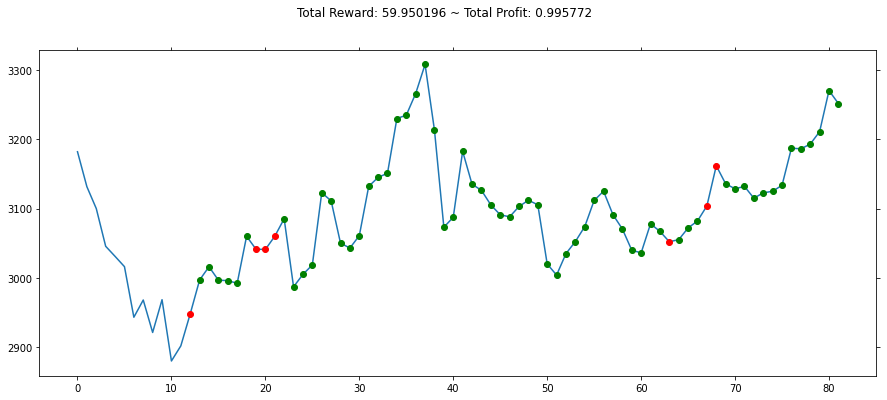

<Figure size 432x288 with 0 Axes>

In [82]:
plt.figure(figsize=(15,6))
plt.cla()
env.render_all()
plt.show()
plt.savefig("TCSNS.jpg")

In [ ]:
! git add "TCSstocksTrader - Copy.ipynb"
! git commit -m "TCS"
! git push origin main